In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *
import rayoptics.gui.layout

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Open the model

In [5]:
app.model = open_model(root_pth/"codev/tests/questar35.seq")
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## List the sequential model

In [6]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+11       air   transmit  1  4.3634e+08
   1:    -0.277967     0.284175     N-BK7   transmit  1      1.7520
   2:    -0.265659      6.61800       air   transmit  1      1.8336
Stop:    -0.062198     -6.61800       air    reflect -1      1.8457
   4:    -0.265659      10.1584       air    reflect  1     0.38287
 Img:     0.000000      0.00000             transmit  1     0.21991


## Update the model

In [7]:
opm.update_model()

## List the paraxial model and first order properties

In [8]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0   1.75197e-11
 1:        1.752      0.252394
 2:       1.7992    0.00467172
 3:       1.8301     -0.222988
 4:      0.35439    -0.0346924
 5:    0.0019733    -0.0346924

       pr_ray_ht    pr_ray_slp
 0:  -4.3634e+08    0.00436335
 1:    -0.027713   0.000370945
 2:    -0.027643    0.00417701
 3:  -1.7437e-08    0.00417701
 4:     0.027643     0.0188645
 5:      0.21928     0.0188645

            power           tau        index    type
 0:             0         1e+11      1.00000    transmit
 1:    -0.1440632       0.18717      1.51827    transmit
 2:     0.1376841         6.618      1.00000    transmit
 3:     0.1243955         6.618     -1.00000    reflect
 4:    -0.5313177        10.158      1.00000    reflect
 5:             0             0      1.00000    transmit


In [9]:
pm.first_order_data()

efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
m              0.001126
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.16
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03467
n img                 1
optical invariant     0.007644


In [10]:
abr_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same)
wav_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, offset_factor=0.1,
                        do_draw_rays=True, do_paraxial_layout=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

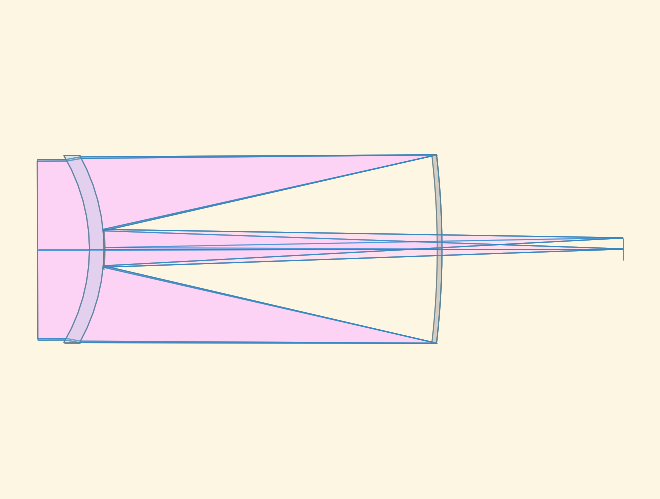

In [12]:
layout_plt.update_data()
layout_plt.plot()

In [13]:
pm.first_order_data()

efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
m              0.001126
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.16
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03467
n img                 1
optical invariant     0.007644


In [14]:
layout_plt.ele_bbox

array([[-0.50232203, -1.84565091],
       [10.44258124,  1.84565091]])

In [15]:
layout_plt.layout.system_length(layout_plt.ele_bbox, 0.1)

(21.103309495180675, 1.0158406227833)

In [16]:
print(opm.specsheet)

infinite conjugates:
imager: IdealImager(m=-0.0, s=-inf, sp=50.49999999999967, tt=inf, f=50.49999999999967)
imager inputs: {'s': -inf}
frozen imager inputs: [True, True, True, True, False]
etendue inputs:
  field:    {'object': {'angle': 0.25}, 'image': {}}
  aperture: {'object': {'pupil': 3.503937007874016}, 'image': {}}
etendue values:
  field:    {'object': {'angle': 0.25}, 'image': {'height': 0.2203492164454277}}
  aperture:
    object: {'pupil': 3.503937007874016, 'NA': -0.03467158712881029, 'f/#': 14.412359550561703}
    image:  {'f/#': -14.412359550561703, 'NA': 0.03467158712881029, 'pupil': -3.503937007874016}


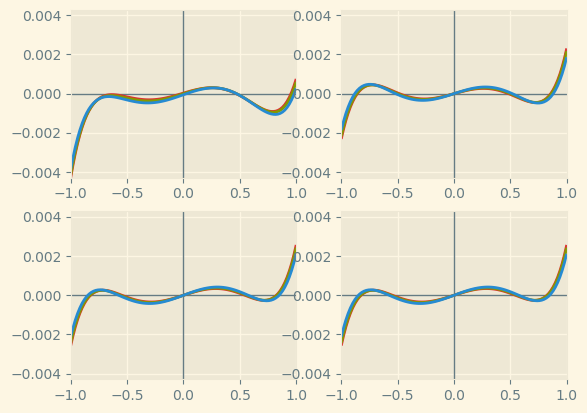

In [17]:
abr_fan_plt.update_data()
abr_fan_plt.plot()

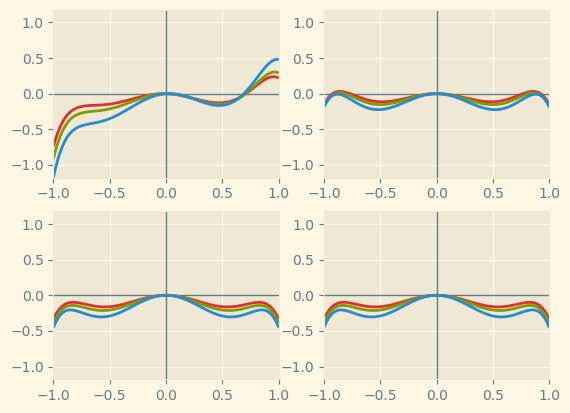

In [18]:
wav_fan_plt.update_data()
wav_fan_plt.plot()

## Trace and display a wavefront as a contour plot

In [19]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)
grid=sm.trace_wavefront(fld, wvl, foc, num_rays=64)

In [20]:
grid = np.rollaxis(grid, 2)
max_val = max(np.max(grid[2]), -np.min(grid[2])); max_val

0.8684717454000304

In [21]:
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1, 2, figsize=(8, 4))
im = axes.imshow(grid[2].T, cmap=mpl.cm.RdBu_r, vmin=-max_val, vmax=max_val, extent=[-1, 1, -1, 1], origin='lower')
#im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes)
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
fig, ax = plt.subplots()
vmin = -max_val
vmax = max_val
levs = np.linspace(np.floor(vmin), np.ceil(vmax), num=21)

ax.contour(grid[2].T, levs, colors='black', linewidths=1, vmin=vmin, vmax=vmax)
cs = ax.contourf(grid[2].T, levs, cmap=mpl.cm.RdBu_r, vmin=vmin, vmax=vmax)
fig.colorbar(cs)
ax.set_aspect('equal')
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …